# Question 3: Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

To analyse the characteristics of houses, we need to import a new dataset that contains the information on the houses. As we already found out, The Bronx has the highest number of heating complaints out of all the boroughs so we will be focussing on the information for houses located in the Bronx. We will also import the heating dataset we created for question 2 to find relationships between the two datasets.

## Import libraries and datasets

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import heating dataset
heating_df = pd.read_csv("heating_df.csv").drop("Unnamed: 0", axis=1)

# import housing information dataset
house_df = pd.read_csv("PLUTO_for_WEB/BX_18v1.csv", usecols=["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR", 
                                                             "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", 
                                                             "NumFloors", "OfficeArea", "ResArea", "ResidFAR", "RetailArea", 
                                                             "YearBuilt", "YearAlter1", "ZipCode", "YCoord","XCoord"])

print("Libraries and datasets imported")

Libraries and datasets imported


In [2]:
heating_df.head()

,Complaint Type,Incident Zip,Incident Address,Street Name,City,Status,Borough,Latitude,Longitude
0,HEATING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,BROOKLYN,Closed,Unspecified,40.638696,-73.946969
1,HEATING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,BRONX,Closed,Unspecified,40.888997,-73.836192
2,HEATING,11226.0,22 MARTENSE STREET,MARTENSE STREET,BROOKLYN,Closed,Unspecified,40.651236,-73.958293
3,HEATING,11212.0,1115 WILLMOHR STREET,WILLMOHR STREET,BROOKLYN,Closed,Unspecified,40.657228,-73.917447
4,HEATING,11210.0,3103 FOSTER AVENUE,FOSTER AVENUE,BROOKLYN,Closed,Unspecified,40.638696,-73.946947


In [3]:
house_df.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


### Isolate heating complaints only to the Bronx borough

In [4]:
bronx_heating_df = heating_df[heating_df["Borough"]=="BRONX"]
bronx_heating_df = bronx_heating_df.dropna(subset=["Street Name", "Incident Zip"])
bronx_heating_df.drop(["Status", "Latitude", "Longitude", "City", "Borough"], axis=1, inplace=True)
bronx_heating_df.reset_index(drop=True, inplace=True)
bronx_heating_df.head()

,Complaint Type,Incident Zip,Incident Address,Street Name
0,HEATING,10468.0,2781 RESERVOIR AVENUE,RESERVOIR AVENUE
1,HEATING,10453.0,10 WEST 182 STREET,WEST 182 STREET
2,HEATING,10468.0,2420 DAVIDSON AVENUE,DAVIDSON AVENUE
3,HEATING,10460.0,1536 LELAND AVENUE,LELAND AVENUE
4,HEATING,10460.0,770 GARDEN STREET,GARDEN STREET


## Very light exploration and cleaning of the housing information dataframe

In [5]:
# What information are we given
house_df.columns

Index(['Lot', 'ZipCode', 'Address', 'LotArea', 'BldgArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'NumBldgs', 'NumFloors', 'LotDepth',
       'BldgDepth', 'YearBuilt', 'YearAlter1', 'BuiltFAR', 'ResidFAR',
       'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype='object')

<br>
This housing properties dataset has column names that are not completely intuitive. As a result of this, I am going to rename the column names. 

<br>

In [6]:
column_names = {"Lot": "Lot Number", "LotArea": "Lot Area", "BldgArea": "Building Area", 
                         "ResArea": "Residential Area", "OfficeArea": "Office Area", "RetailArea": "Retail Area",
                         "NumBldgs": "Num of Buildings", "NumFloors": "Num of Floors", "LotDepth": "Lot Depth",
                         "BldgDepth": "Building Depth", "YearBuilt": "Year Built", "YearAlter1": "Year 1st Altered",
                         "BuiltFAR": "Floor Area Ratio", "ResidFAR": "Max Residential FAR", "CommFAR": "Max Commercial FAR",
                         "FacilFAR": "Max Facility FAR", "XCoord": "X Coord", "YCoord": "Y Coord"}

house_df.rename(columns=column_names, inplace=True)

In [7]:
# Check the new columns
house_df.columns

Index(['Lot Number', 'ZipCode', 'Address', 'Lot Area', 'Building Area',
       'Residential Area', 'Office Area', 'Retail Area', 'Num of Buildings',
       'Num of Floors', 'Lot Depth', 'Building Depth', 'Year Built',
       'Year 1st Altered', 'Floor Area Ratio', 'Max Residential FAR',
       'Max Commercial FAR', 'Max Facility FAR', 'X Coord', 'Y Coord'],
      dtype='object')

In [8]:
# How many entries and columns do we have
house_df.shape

(89854, 20)

In [9]:
# Make sure the data types are correct
house_df.dtypes

Lot Number               int64
ZipCode                float64
Address                 object
Lot Area                 int64
Building Area            int64
Residential Area         int64
Office Area              int64
Retail Area              int64
Num of Buildings         int64
Num of Floors          float64
Lot Depth              float64
Building Depth         float64
Year Built               int64
Year 1st Altered         int64
Floor Area Ratio       float64
Max Residential FAR    float64
Max Commercial FAR     float64
Max Facility FAR       float64
X Coord                float64
Y Coord                float64
dtype: object

In [10]:
house_df.dropna(subset=["ZipCode", "Address"], inplace=True)
house_df.head()

,Lot Number,ZipCode,Address,Lot Area,Building Area,Residential Area,Office Area,Retail Area,Num of Buildings,Num of Floors,Lot Depth,Building Depth,Year Built,Year 1st Altered,Floor Area Ratio,Max Residential FAR,Max Commercial FAR,Max Facility FAR,X Coord,Y Coord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


## Approach to the question

To answer question 3, I am going to take two approaches:
1. Use a binary approach where the features will either end in a complaint being made(represented by a 1) or not (represented by a 0)
2. Using total number of complaints for each street to analyse correlation

## First approach

Use the heating dataframe and add a column representing a complaint has been made.

In [11]:
binary_heating_df = bronx_heating_df
binary_heating_df["Complaint Made"] = np.ones(len(binary_heating_df), dtype=int)
binary_heating_df.drop("Complaint Type", axis=1, inplace=True)
binary_heating_df.head()

,Incident Zip,Incident Address,Street Name,Complaint Made
0,10468.0,2781 RESERVOIR AVENUE,RESERVOIR AVENUE,1
1,10453.0,10 WEST 182 STREET,WEST 182 STREET,1
2,10468.0,2420 DAVIDSON AVENUE,DAVIDSON AVENUE,1
3,10460.0,1536 LELAND AVENUE,LELAND AVENUE,1
4,10460.0,770 GARDEN STREET,GARDEN STREET,1


In [12]:
house_df.head()

,Lot Number,ZipCode,Address,Lot Area,Building Area,Residential Area,Office Area,Retail Area,Num of Buildings,Num of Floors,Lot Depth,Building Depth,Year Built,Year 1st Altered,Floor Area Ratio,Max Residential FAR,Max Commercial FAR,Max Facility FAR,X Coord,Y Coord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


### Merge the heating dataframe with the housing dataframe
Note that when there is no heating complaint, the value in "Complaint Made" will be equal to 0

In [14]:
merged_df = pd.merge(binary_heating_df, house_df, how="right", left_on=["Street Name", "Incident Zip"], right_on=["Address", "ZipCode"])
merged_df.drop(["Street Name", "Incident Zip", "Address", "ZipCode", "X Coord", "Y Coord"], axis=1, inplace=True)
merged_df["Complaint Made"].fillna(0, inplace=True)
merged_df["Complaint Made"] = merged_df["Complaint Made"].astype(int)
merged_df["Complaint Made"].value_counts()
merged_df.head(10)

,Incident Address,Complaint Made,Lot Number,Lot Area,Building Area,Residential Area,Office Area,Retail Area,Num of Buildings,Num of Floors,Lot Depth,Building Depth,Year Built,Year 1st Altered,Floor Area Ratio,Max Residential FAR,Max Commercial FAR,Max Facility FAR
0,2781 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
1,2691 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
2,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
3,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
4,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
5,2781 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
6,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
7,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
8,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
9,2755 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0


### Find the Pearson Correlation and P-Value of the housing characteristics with the target "Complaint Made"

In [15]:
from scipy import stats

corr_df = pd.DataFrame(columns=merged_df.columns[2:], index=["Pearson Corr", "P-Value"])
for column in corr_df.columns:
    pearson_coef, p_value = stats.pearsonr(merged_df["Complaint Made"], merged_df[column])
    corr_df[column]["Pearson Corr"] = pearson_coef
    corr_df[column]["P-Value"] = p_value

corr_df

,Lot Number,Lot Area,Building Area,Residential Area,Office Area,Retail Area,Num of Buildings,Num of Floors,Lot Depth,Building Depth,Year Built,Year 1st Altered,Floor Area Ratio,Max Residential FAR,Max Commercial FAR,Max Facility FAR
Pearson Corr,0.0135295,0.0113194,-0.079132,-0.0981778,0.00396574,-0.0695622,-0.253903,-0.731387,0.0277289,-0.602128,-0.755379,-0.218871,-0.421666,0.0663305,0.0513572,0.0679223
P-Value,3.18555e-49,5.62946e-35,0,0,1.54197e-05,0,0,0,9.60683e-201,0,0,0,0,0,0,0


### Visualise the Pearson Correlations with a correlation matrix

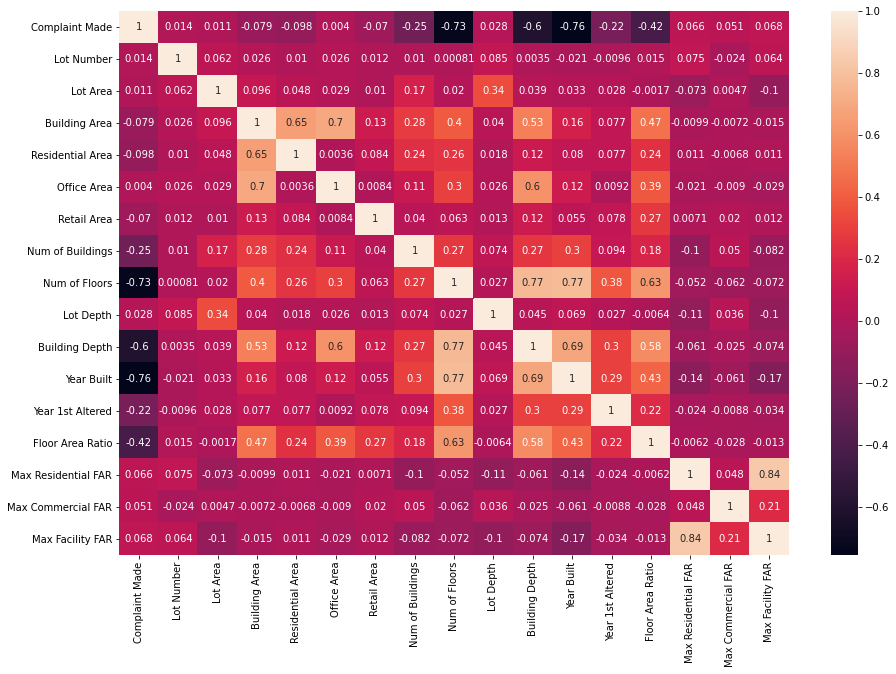

In [16]:
pearson_df = merged_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(pearson_df, annot=True)
plt.show()

### Conclusion of first approach

From the correlation dataframe, and the correlation matrix, we see that the feature with the highest correlation to a heating complaint being made is the **year that the building was built (pearson=-0.7553)**. The next highest is the number of floors the house has (pearson=-0.7313). The results of the P-values are inconclusive as they are all zero or extremely close to zero. From this, we may infer that this binary approach may not be the method for answering our questions.

## Second Approach
We are going to see if the features of the buildings have any correlation with the number of complaints.

In [17]:
# Create a new dataframe for number of complaints for each street
num_com_df = pd.DataFrame({"Number of Complaints" : bronx_heating_df.groupby(["Incident Zip", "Street Name"]).size()}).reset_index()
num_com_df.head()

,Incident Zip,Street Name,Number of Complaints
0,10451.0,3 AVENUE,492
1,10451.0,BROOK AVENUE,148
2,10451.0,COLLEGE AVENUE,6
3,10451.0,CONCOURSE VILLAGE EAST,252
4,10451.0,CONCOURSE VILLAGE WEST,409


### Merge the two dataframes

In [18]:
merged_df2 = pd.merge(num_com_df, house_df, how="right", left_on=["Street Name", "Incident Zip"], right_on=["Address", "ZipCode"])
merged_df2.drop(["Street Name", "Incident Zip", "Address", "ZipCode", "X Coord", "Y Coord"], axis=1, inplace=True)
merged_df2["Number of Complaints"].fillna(0, inplace=True)
merged_df2["Number of Complaints"] = merged_df2["Number of Complaints"].astype(int)
merged_df2["Number of Complaints"].value_counts()
merged_df2.head(10)

,Number of Complaints,Lot Number,Lot Area,Building Area,Residential Area,Office Area,Retail Area,Num of Buildings,Num of Floors,Lot Depth,Building Depth,Year Built,Year 1st Altered,Floor Area Ratio,Max Residential FAR,Max Commercial FAR,Max Facility FAR
0,975,9039,4905,0,0,0,0,0,0.0,93.55,0.0,0,0,0.0,6.02,0.0,6.5
1,4,112,11692,0,0,0,0,0,0.0,146.25,0.0,0,0,0.0,0.00,0.0,0.0
2,4,114,0,0,0,0,0,0,0.0,151.58,0.0,0,0,0.0,0.00,2.0,6.5
3,4,130,7200,0,0,0,0,0,0.0,118.00,0.0,1931,0,0.0,0.00,2.0,6.5
4,4,1,400,0,0,0,0,0,0.0,5.00,5.0,0,0,0.0,0.00,2.0,0.0
5,2,1,9743,0,0,0,0,0,0.0,370.80,0.0,0,0,0.0,3.44,3.4,6.5
6,2,4,4900,0,0,0,0,0,0.0,100.00,0.0,0,0,0.0,3.44,3.4,6.5
7,64,60,400,0,0,0,0,0,0.0,5.00,5.0,0,0,0.0,0.00,2.0,0.0
8,64,40,13546,0,0,0,0,0,0.0,74.00,0.0,0,0,0.0,5.40,2.0,6.5
9,64,1,253,0,0,0,0,0,0.0,0.00,5.0,0,0,0.0,0.00,2.0,0.0


### Find the Pearson Correlation and P-Value of the housing characteristics with the target "Complaint Made"

In [19]:
corr_df2 = pd.DataFrame(columns=merged_df2.columns[1:], index=["Pearson Corr", "P-Value"])
for column in corr_df2.columns:
    pearson_coef, p_value = stats.pearsonr(merged_df2["Number of Complaints"], merged_df2[column])
    corr_df2[column]["Pearson Corr"] = pearson_coef
    corr_df2[column]["P-Value"] = p_value

corr_df2

,Lot Number,Lot Area,Building Area,Residential Area,Office Area,Retail Area,Num of Buildings,Num of Floors,Lot Depth,Building Depth,Year Built,Year 1st Altered,Floor Area Ratio,Max Residential FAR,Max Commercial FAR,Max Facility FAR
Pearson Corr,0.00608823,0.00124213,-0.00878389,-0.00795726,0.00177427,-0.00562281,-0.0429668,-0.117689,0.0142087,-0.1181,-0.277962,-0.0233512,-0.0476101,0.0282175,0.0231703,0.0265687
P-Value,0.0685153,0.710158,0.00858445,0.0172735,0.595516,0.0925013,7.40908e-38,1.68606e-273,2.12414e-05,2.07135e-275,0,2.79631e-12,4.2979e-46,3.05826e-17,4.10718e-12,1.85436e-15


### Visualise the Pearson Correlations with a correlation matrix

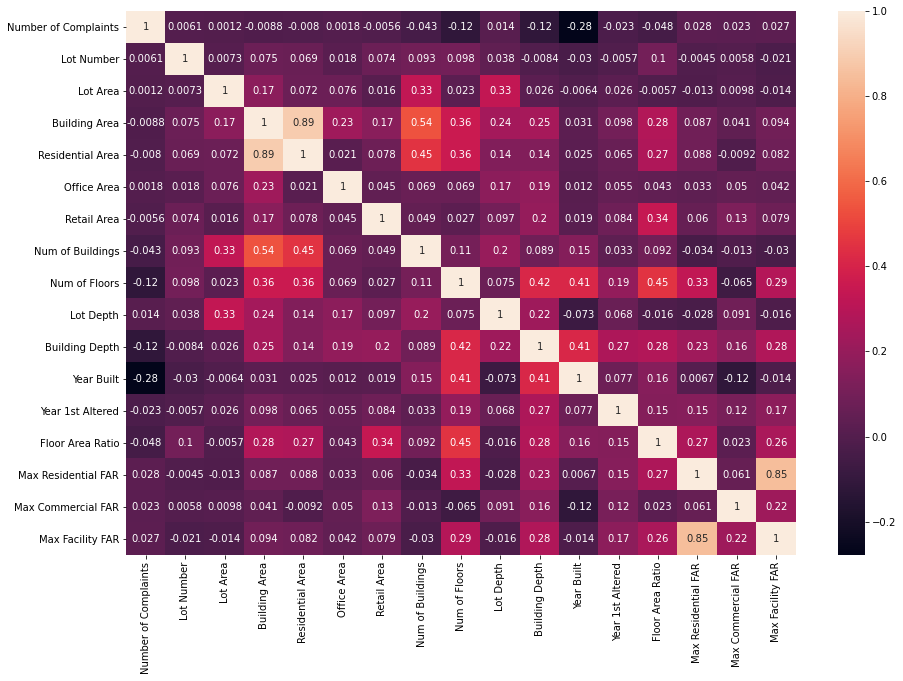

In [20]:
pearson_df2 = merged_df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(pearson_df2, annot=True)
plt.show()

### Conclusion of second approach
From the pearson correlation, we see that once again the **year the building was built** has the highest correlation to the number of complaints made with a pearson correlation value of **-0.277962** followed by the building depth and number of floors. Also from the p-values of the features, we see that this approach is a better method of finding the correlation between features and complaints made. 

## Final Conclusion
From both approaches, we see that there are some features that may be useful in predicting whether a complaint will be made or how many complaints will be made from the features of a building. Using the binary approach, we find that there are a 3 features that have a high correlation of a complaint being made. These are: **the year that the building was built (pearson=-0.7553)**, **number of floors the house has (pearson=-0.7313)**, and **the depth of the building (pearson=-0.6021)**. Although we have three features that have a high correlation, we see that the vast majority of p-values are zeros with the rest all being extremely close to 0. This either means that all the features are statistically significant or that the binary approach is not suitable for the dataset we have. From the second approach, we do not have any features that are highly correlated to the number of complaints made for a building. The highest correlation we have is once again **the year the building was built (pearson=-0.277962)** followed by the depth of the building, and the number of floors it has. However, the p-values of the second approach are much more promising as there do not seem to be any abnormalities and most of the values are less than or equal to 0.5.

Overall, for both approaches, the year that the building was built seems to have the highest correlation to complaints being made. Although it is out of the scope of the project, we could think about a possible reason for this correlation such as older buildings were made with less advanced technology compared to more recent buildings or maybe older buildings have had more time to deteriorate that haven't been maintained.

## Save dataframes

In [21]:
house_df.to_csv("Housing Information Cleaned.csv", index=False)
merged_df.to_csv("Merged Binary Complaint Approach.csv", index=False)
merged_df2.to_csv("Num of Complaints Approach.csv", index=False)
print("Dataframes saved")

Dataframes saved
